<a href="https://colab.research.google.com/github/gichukia/My-First-Repo/blob/main/Product_Review_Text_Mining_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TEXT MINING AND SENTIMENT ANALYSIIS

## Text Mining

https://www.kaggle.com/datasets/mafaisal007/product-reviews-and-ratings-sentiment-analysis

Data set from a toy store in Europe on product review.

In [ ]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk # Natural Language Toolkit library for text processing
from nltk.corpus import stopwords # Stop words corpus
from nltk.tokenize import word_tokenize # Word tokenizer
from collections import Counter # Counter for counting frequency of elements


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Load data

from google.colab import files
uploaded = files.upload()

Saving Reviews And Ratings.csv to Reviews And Ratings.csv


In [ ]:
# Read the data
data = pd.read_csv("Reviews And Ratings.csv")
text = data['translated'].values # Extract text values from the translated column which contains the product reviews
text

array(['What to say? My daughter LOVES him and I with her. Very soft, zero visible seams, tender and especially functional. It reproduces according to the choice of music, white noise, the sound of the Breath or heartbeat. Also the otter tummy lights up and moves as if breathing. For the newborn is a real comfort in the cradle, always kept in safety, I place it away from his face so that he can perceive it even just by touching it with his hand. Wonderful purchase, we are really happy!',
       'I decided to test this plush to my grandson, just three years old. As soon as he saw it he was very happy and he exclaimed it was: "Zia, it\'s very soft!" Actually the plush is really soft to the touch and a real companion for the nights, of our children. The animal represented is a gray otter, a toy animal that is able to help children play and also relax, during the night and during the time they rest. This otter is able to emit vibrations that calm and relax the child, but also of music, ver

In [ ]:
# Preprocessing
nltk.download('stopwords') # English stop words
nltk.download('punkt') # To divide test into a list of sentenses

stop_words = set(stopwords.words("english")) # set of stop words in English
text = [word_tokenize(doc.lower()) for doc in text] # tokenize text and convert to lowercase
text = [[word for word in doc if word.isalpha() and word not in stop_words] for doc in text] # remove stop words and non-alphabetic characters
text = [" ".join(doc) for doc in text] # join tokens back into sentences

In [ ]:
# Calculate word frequency
text = " ".join(text) # join sentences into a single string
words = word_tokenize(text) # tokenize text
word_frequency = Counter(words) # count frequency of words

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0, flags=flags)


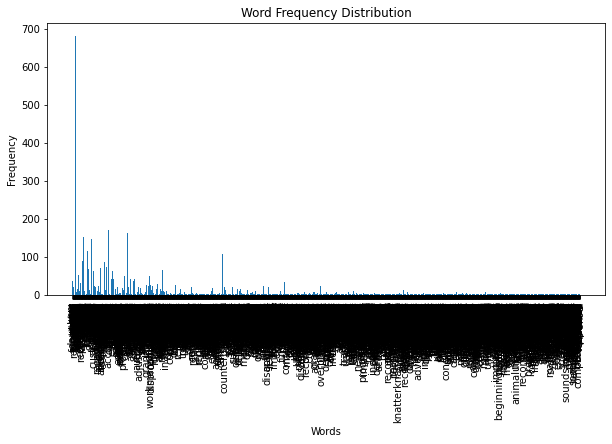

In [ ]:
# Plot word frequency
plt.figure(figsize=(10,5))
plt.bar(word_frequency.keys(), word_frequency.values()) # create bar plot of word frequency
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution")
plt.xticks(rotation=90) # rotate x-axis labels for better readability
plt.show()

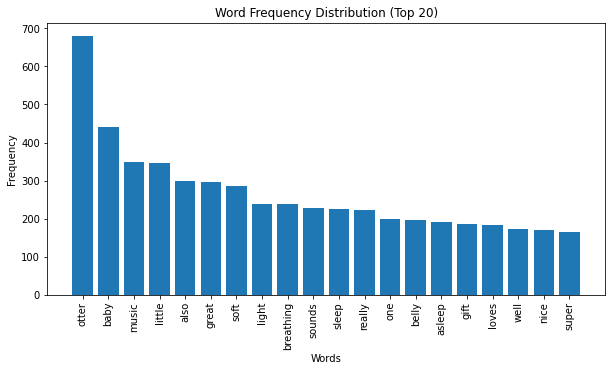

In [ ]:
# Plot only the 20 most used words
plt.figure(figsize=(10,5))
most_common = word_frequency.most_common(20) # get the 20 most common words
keys = [pair[0] for pair in most_common] # get the words
values = [pair[1] for pair in most_common] # get the frequencies
plt.bar(keys, values)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Top 20)")
plt.xticks(rotation=90)
plt.show()

In [ ]:
most_common

[('otter', 681),
 ('baby', 441),
 ('music', 350),
 ('little', 347),
 ('also', 300),
 ('great', 296),
 ('soft', 286),
 ('light', 239),
 ('breathing', 238),
 ('sounds', 227),
 ('sleep', 224),
 ('really', 223),
 ('one', 199),
 ('belly', 195),
 ('asleep', 190),
 ('gift', 186),
 ('loves', 183),
 ('well', 172),
 ('nice', 169),
 ('super', 164)]

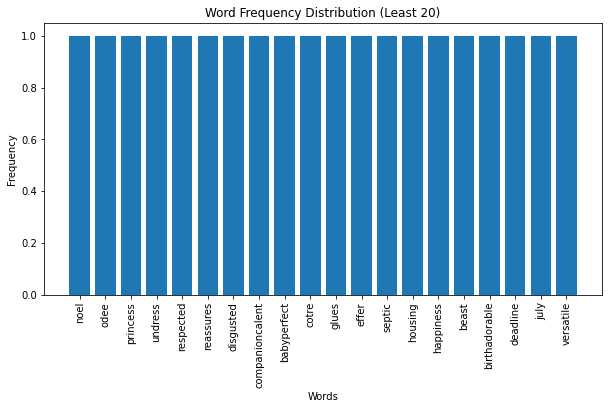

In [ ]:
# Plot only the 20 least used words
plt.figure(figsize=(10,5))
least_common = word_frequency.most_common()[:-21:-1] # get the 20 least common words
keys = [pair[0] for pair in least_common]
values = [pair[1] for pair in least_common]
plt.bar(keys, values)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Least 20)")
plt.xticks(rotation=90)
plt.show()

# Sentiment Analysis

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer # for sentiment analysis
nltk.download('vader_lexicon') # provides sentiment scores based on the words used. 
# Measures the score on a scale of -4 to 4

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Performing sentiment analysis
sentiment_analyzer = SentimentIntensityAnalyzer()
sentiments = [sentiment_analyzer.polarity_scores(doc)['compound'] for doc in text]

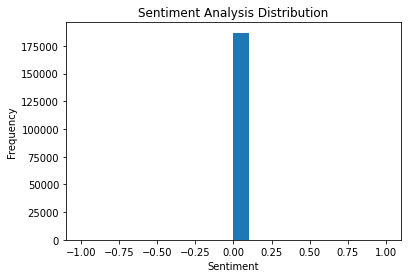

In [ ]:
# Plot sentiments distribution
plt.hist(sentiments, bins=np.arange(-1, 1.1, 0.1))
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Sentiment Analysis Distribution")
plt.show()